In [25]:
library(qvalue)
library(dplyr)

In [8]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/"

In [9]:
########## MOFA 10
file1 = paste0(mydir, "MOFA10/new4/summary.csv")
df1 = read.csv(file1, row.names=1)
nrow(df1)
head(df1,2)

[1] 4470

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,16,0.02606257,16_81118466_A_G,0.02606257
1,ENSG00000011523_CEP68,2,2,0.03995225,2_65279223_C_T,0.07990451


In [10]:
df1 <- df1[order(df1$pv, df1$pv_raw),]
df1 = df1[-which(duplicated(df1$gene)),]
df1$qv = qvalue(df1$pv, pi0 = 1)$qvalue

In [11]:
df2 = df1[df1$qv < 0.05,]
nrow(df2)

[1] 322

In [23]:
df2$eqtl = paste0(df2$gene,"-",df2$snpID)
head(df2,2)

,gene,n_snps,chrom,pv_raw,snpID,pv,qv,eqtl
3483,ENSG00000169877_AHSP,2,16,4.441206e-52,16_31522723_T_C,8.882413e-52,2.877902e-48,ENSG00000169877_AHSP-16_31522723_T_C
207,ENSG00000229150_CRYGEP,2,2,2.649644e-48,2_208977797_G_T,5.299288e-48,8.584846e-45,ENSG00000229150_CRYGEP-2_208977797_G_T


In [32]:
### betaGxC estimate of magnitude
df_beta = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_est_single_GxE_genetic_effects.csv", row.names=1)
colnames(df_beta)[1] = "beta_GxC"
df_beta$eqtl = gsub("_-","-",df_beta$eqtl)
nrow(df_beta)
head(df_beta,2)

[1] 322

,beta_GxC,eqtl
0,0.1511622,ENSG00000005059_CCDC109B-4_110648632_T_A
1,0.1957095,ENSG00000006016_CRLF1-19_18735221_G_T


In [33]:
### betaG's across cells from model 
df_betaG = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_persistent_genetic_effect_all.txt", sep="\t",row.names = 1)
df_betaG$eqtl = rownames(df_betaG)
nrow(df_betaG)
head(df_betaG,2)

[1] 322

,beta_G,eqtl
ENSG00000005059_CCDC109B-4_110648632_T_A,-0.005477985,ENSG00000005059_CCDC109B-4_110648632_T_A
ENSG00000006016_CRLF1-19_18735221_G_T,-0.056811980,ENSG00000006016_CRLF1-19_18735221_G_T


In [34]:
df_betas = inner_join(df_beta, df_betaG)
nrow(df_betas)
head(df_betas,2)

Joining, by = "eqtl"


[1] 322

beta_GxC,eqtl,beta_G
0.1511622,ENSG00000005059_CCDC109B-4_110648632_T_A,-0.005477985
0.1957095,ENSG00000006016_CRLF1-19_18735221_G_T,-0.056811980


In [35]:
df3 = inner_join(df2, df_betas)
nrow(df3)
head(df3,2)

Joining, by = "eqtl"


[1] 322

gene,n_snps,chrom,pv_raw,snpID,pv,qv,eqtl,beta_GxC,beta_G
ENSG00000169877_AHSP,2,16,4.441206e-52,16_31522723_T_C,8.882413e-52,2.877902e-48,ENSG00000169877_AHSP-16_31522723_T_C,0.4599185,-0.1091049
ENSG00000229150_CRYGEP,2,2,2.649644e-48,2_208977797_G_T,5.299288e-48,8.584846e-45,ENSG00000229150_CRYGEP-2_208977797_G_T,0.5432607,0.2356903


In [37]:
df3$ensembl_gene_id = gsub("_.*","",df3$gene)
df3$gene_name = gsub(".*_","",df3$gene)
df3$snp_id = df3$snpID
head(df3,2)

gene,n_snps,chrom,pv_raw,snpID,pv,qv,eqtl,beta_GxC,beta_G,ensembl_gene_id,gene_name,snp_id
ENSG00000169877_AHSP,2,16,4.441206e-52,16_31522723_T_C,8.882413e-52,2.877902e-48,ENSG00000169877_AHSP-16_31522723_T_C,0.4599185,-0.1091049,ENSG00000169877,AHSP,16_31522723_T_C
ENSG00000229150_CRYGEP,2,2,2.649644e-48,2_208977797_G_T,5.299288e-48,8.584846e-45,ENSG00000229150_CRYGEP-2_208977797_G_T,0.5432607,0.2356903,ENSG00000229150,CRYGEP,2_208977797_G_T


In [38]:
df4 = df3[,c("gene_name","ensembl_gene_id","snp_id","pv_raw","pv","qv","beta_G","beta_GxC")]
head(df4,2)

gene_name,ensembl_gene_id,snp_id,pv_raw,pv,qv,beta_G,beta_GxC
AHSP,ENSG00000169877,16_31522723_T_C,4.441206e-52,8.882413e-52,2.877902e-48,-0.1091049,0.4599185
CRYGEP,ENSG00000229150,2_208977797_G_T,2.649644e-48,5.299288e-48,8.584846e-45,0.2356903,0.5432607


In [39]:
write.csv(df4, "/hps/nobackup/stegle/users/acuomo/singlecell_interaction_eqtls/endodiff_GxC_SuppTable1.csv")

In [1]:
########################################################################################################
########################################################################################################
########################################################################################################
########################################################################################################

In [10]:
library(ggplot2)
library(RColorBrewer)
library(circlize)

In [3]:
df = read.csv("/hps/nobackup/stegle/users/acuomo/singlecell_interaction_eqtls/endodiff_GxC_SuppTable1.csv", row.names = 1)
head(df)

gene_name,ensembl_gene_id,snp_id,pv_raw,pv,qv,beta_G,beta_GxC
AHSP,ENSG00000169877,16_31522723_T_C,4.441206e-52,8.882413e-52,2.877902e-48,-0.1091049,0.4599185
CRYGEP,ENSG00000229150,2_208977797_G_T,2.649644e-48,5.299288e-48,8.584846e-45,0.2356903,0.5432607
FAM65B,ENSG00000111913,6_24979164_T_A,5.863853e-44,5.863853e-44,6.332961e-41,0.1459130,0.5698241
UPK3B,ENSG00000243566,7_76137375_C_T,1.700073e-29,1.700073e-29,1.377059e-26,-0.1198411,0.4842759
SURF2,ENSG00000148291,9_136227260_A_G,8.506044e-27,8.506044e-27,5.511917e-24,-0.7289752,0.7212131
HLA-DQB1,ENSG00000179344,6_32634922_A_G,8.324037e-26,8.324037e-26,4.494980e-23,-0.7078382,1.0644941


In [44]:
myPalette <- colorRampPalette(rev(brewer.pal(9, "Blues")))
sc <- scale_colour_gradientn(colours = myPalette(100), limits=c(0, 0.05))

In [59]:
cor.test(abs(df$beta_G), df$beta_GxC)


	Pearson's product-moment correlation

data:  abs(df$beta_G) and df$beta_GxC
t = 8.7996, df = 320, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3489324 0.5253506
sample estimates:
      cor 
0.4413971 


[1] 0.4413971

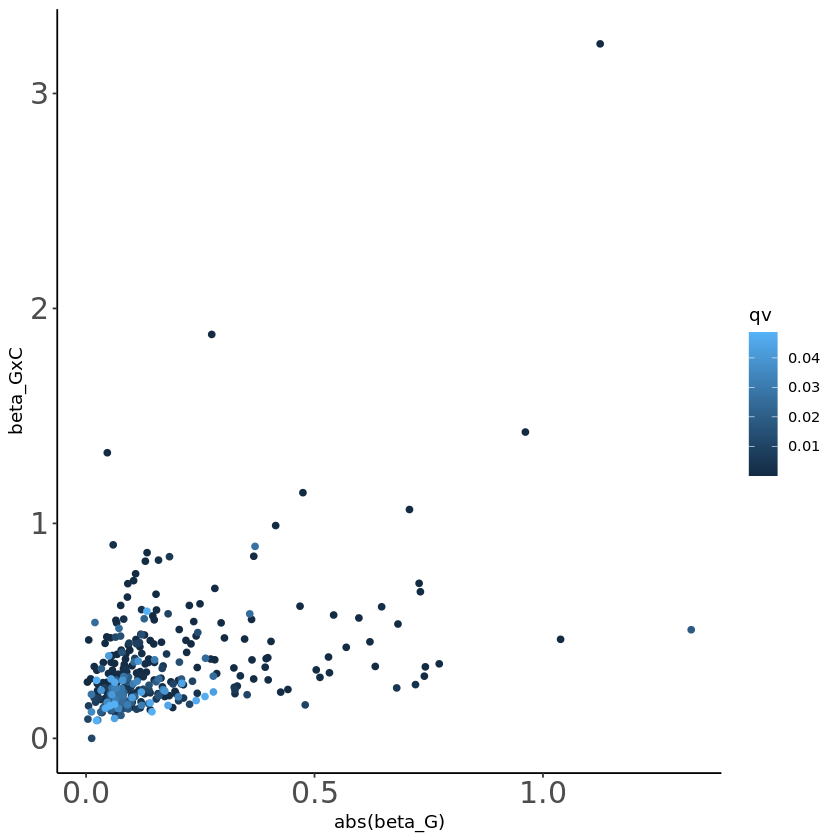

In [53]:
cor(abs(df$beta_G), df$beta_GxC)
p = ggplot(df, aes(x=abs(beta_G), y=beta_GxC, colour=qv)) + geom_point() + theme_classic() 
p = p + theme(axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18))
# p = p + scale_color_gradient2(low = "white",mid = "coral",high = "firebrick", midpoint = 15)
# p = p + sc
p